In [2]:
import requests
x = 2;
#link ="https://www.trustpilot.com/review/www.triaddogfence.com"
#link = "https://www.trustpilot.com/review/efile4biz.com"
#link = "https://www.trustpilot.com/review/www.nike.com"
#link ="https://www.trustpilot.com/review/www.amazon.com"
link = "https://www.trustpilot.com/review/www.lufthansa.com"
page="?page="
req = requests.get(link)
currentPage = req.url
print(currentPage)
url = link 
print(url)

reviewStar = []
reviewContent = []
reviewTitle = []
time = []

while (True):
    print('Title: ',len(reviewTitle))
    print('Comment: ',len(reviewContent))
    url = link + page + str(x)
    htmlText = req.text
    splitList = htmlText.split("review-title")
    del(splitList[0])
    
    listRange = len(splitList)
    NoComment=[]
    titleNo =0
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('">')[1]
        if 'review-content__text' not in afterFirstSplit:
            print("No comment exist for number ", i ," review in page ", x-1 )
            print(i)
            NoComment.append(i)
        afterSecondSplit = afterFirstSplit.split('</a>')[0]
        i += 1
        titleNo += 1
        reviewTitle.append(afterSecondSplit)
    #print(reviewTitle)
    
    
    
    splitList = htmlText.split("review-content__text")
    del(splitList[0])

    listRange = len(splitList)
    commentNo =0
    for i in range(listRange):
        if i in NoComment:
            reviewContent.append(" ") # No comment
            commentNo += 1
        afterFirstSplit = splitList[i].split('>\n            ')[1]
        afterSecondSplit = afterFirstSplit.split('\n            </p>')[0]
        reviewContent.append(afterSecondSplit)
        commentNo += 1
        i += 1
    while (titleNo>commentNo):
        print('titleNo: ',titleNo)
        print('commentNo: ',commentNo)
        reviewContent.append(" ")
        commentNo += 1

    splitList = htmlText.split('publishedDate":')
    del(splitList[0])
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('"')[1]
        afterSecondSplit = afterFirstSplit.split('T')[0]
        i += 1
        time.append(afterSecondSplit)
        
        
        
    splitList = htmlText.split("star-rating star-rating--medium")
    del(splitList[0])
    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('stars/stars-')[1]
        afterSecondSplit = afterFirstSplit.split('.svg')[0]
        i += 1
        reviewStar.append(afterSecondSplit)
    
    print(url)
    x+=1
    req = requests.get(url)
    currentPage = req.url
    print(currentPage)
    print(currentPage != link)
    if (currentPage == link):
        break

        
print('rating: ',len(reviewStar))        
print('Title: ',len(reviewTitle))
print('Comment: ',len(reviewContent))
print('time: ',len(time))
#print(reviewStar)        
import pandas as pd
dataset = pd.DataFrame({'Rating': reviewStar, 'Title': reviewTitle, 'Comment': reviewContent, 'time': time})
dataset.to_csv(r'C:\Users\Lufthansa.csv', index = None, header=True)
dataset


https://www.trustpilot.com/review/www.lufthansa.com
https://www.trustpilot.com/review/www.lufthansa.com
Title:  0
Comment:  0
https://www.trustpilot.com/review/www.lufthansa.com?page=2
https://www.trustpilot.com/review/www.lufthansa.com?page=2
True
Title:  20
Comment:  20
https://www.trustpilot.com/review/www.lufthansa.com?page=3
https://www.trustpilot.com/review/www.lufthansa.com?page=3
True
Title:  40
Comment:  40
https://www.trustpilot.com/review/www.lufthansa.com?page=4
https://www.trustpilot.com/review/www.lufthansa.com?page=4
True
Title:  60
Comment:  60
No comment exist for number  5  review in page  4
5
https://www.trustpilot.com/review/www.lufthansa.com?page=5
https://www.trustpilot.com/review/www.lufthansa.com?page=5
True
Title:  80
Comment:  80
https://www.trustpilot.com/review/www.lufthansa.com?page=6
https://www.trustpilot.com/review/www.lufthansa.com?page=6
True
Title:  100
Comment:  100
https://www.trustpilot.com/review/www.lufthansa.com?page=7
https://www.trustpilot.com

,Rating,Title,Comment,time
0,1,Totally unhelpful woman on the phone,Totally unhelpful woman on the phone. For ...,2020-05-23
1,1,Unbelievably bad service,Unbelievably difficult to contact and tota...,2020-05-23
2,1,Untrustworthy corrupt liars,Like hundreds of people my flights were ca...,2020-05-22
3,1,Worst airline ever,Worst airline ever. Refuses to refund. Can...,2020-05-22
4,1,Bailiffs on the way to Lufthansa UK offices,See judgement in County Court G5QZ25E2 Pea...,2020-05-22
...,...,...,...,...
580,3,Great Service as long as you don&#39;t want to...,I booked to fly from UK to Frankfurt via D...,2011-12-22
581,3,"Great service, but worn out planes!",Very nice service on board. No complaints!...,2011-11-09
582,2,Paid Fare Guarantee Service,I misinterpretated the following contradic...,2011-11-02
583,2,A company that essentially ... doesn&#39;t car...,I flew to South Africa in May on Lufthansa...,2011-07-23


In [3]:
import datetime
time = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in time]

In [4]:
time[0].month

5

In [5]:
dataset.head()

,Rating,Title,Comment,time
0,1,Totally unhelpful woman on the phone,Totally unhelpful woman on the phone. For ...,2020-05-23
1,1,Unbelievably bad service,Unbelievably difficult to contact and tota...,2020-05-23
2,1,Untrustworthy corrupt liars,Like hundreds of people my flights were ca...,2020-05-22
3,1,Worst airline ever,Worst airline ever. Refuses to refund. Can...,2020-05-22
4,1,Bailiffs on the way to Lufthansa UK offices,See judgement in County Court G5QZ25E2 Pea...,2020-05-22


In [6]:
dataset.Comment[10]

'    Simply criminal,<br />Cancelled flights promised refunds... Two months later nothing but more news of them threatening bankruptcy to avoid bailout conditions.<br />Support teams continue to use half truths to try fool customers into thinking refunds are coming, clearly nothing is getting processed.<br />Avoid at all costs'

In [7]:
#Cleaning the Comments**

In [8]:
#removing <br />
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('<br />',' '))
#Replacing  &#39; to '
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#39;',"'"))
#Replacing  &#8221; to "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8221;','"'))
#Replacing  &#8220; to "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8220;','"'))
#Replacing  &#8217; to '
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8217;',"'"))
#Replacing  &#8364; to €
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8364;',"€"))
#Replacing  &gt; to >
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&gt;',">"))
#Replacing  &amp; to &
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&amp;',"&"))
#Replacing &quot; to & "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&quot;','"'))
#Removing &#8216; 
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8216;',''))
#Removing \' 
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace("\'",""))
dataset['Comment'][10]

'    Simply criminal, Cancelled flights promised refunds... Two months later nothing but more news of them threatening bankruptcy to avoid bailout conditions. Support teams continue to use half truths to try fool customers into thinking refunds are coming, clearly nothing is getting processed. Avoid at all costs'

In [9]:
#leaning the title
#removing &#8230;
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#8230;',''))
#Replacing  &#39; to '
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#39;',"'"))
dataset['Title'][10]

'Simply criminal,'

In [10]:
import spacy
from spacy import displacy
import en_core_web_lg
nlp = en_core_web_lg.load()

In [11]:
text = nlp(dataset['Comment'][2])
displacy.render(text,style='ent', jupyter=True)

In [12]:
text = nlp(dataset['Comment'][2])
colorGradient = {'DATE':'linear-gradient(90deg, #aa9cfc, #fc9ce7)'}
colors = {'DATE':'red'}
displacy.render(text,style='ent', jupyter=True, options={'ents':['DATE'], 'colors':colorGradient})

In [13]:
text = nlp(dataset['Comment'][15])
colorGradient = {'ORG':'linear-gradient(90deg, #eeff88, #ff2211)'}
colors = {'DATE':'red'}
displacy.render(text,style='ent', jupyter=True, options={'ents':['ORG'], 'colors':colorGradient})

In [14]:
import seaborn as sns
sns.countplot(x="Rating", data=dataset)

In [15]:
dataset['length'] = dataset["Comment"].apply(lambda x: len(x) - x.count(" "))
dataset.head()

,Rating,Title,Comment,time,length
0,1,Totally unhelpful woman on the phone,Totally unhelpful woman on the phone. For ...,2020-05-23,258
1,1,Unbelievably bad service,Unbelievably difficult to contact and tota...,2020-05-23,198
2,1,Untrustworthy corrupt liars,Like hundreds of people my flights were ca...,2020-05-22,1455
3,1,Worst airline ever,Worst airline ever. Refuses to refund. Can...,2020-05-22,93
4,1,Bailiffs on the way to Lufthansa UK offices,See judgement in County Court G5QZ25E2 Pea...,2020-05-22,810


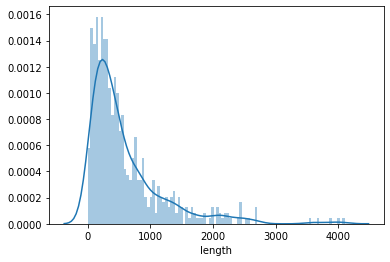

In [16]:
sns.distplot(dataset['length'],bins=100);

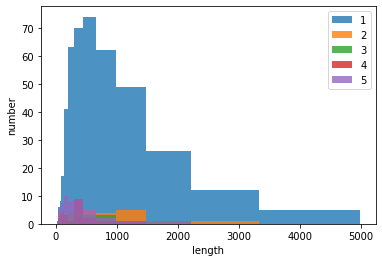

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bins = 1.5**(np.arange(0,22))
plt.hist(dataset[dataset['Rating']=='1']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='2']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='3']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='4']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='5']['length'], bins=bins,alpha=0.8)
plt.legend(('1','2','3','4','5'))
plt.xlabel("length")
plt.ylabel("number")
plt.show()

In [18]:
#Sentiment analyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Firoozeh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [20]:
dataset['scores'] = dataset['Comment'].apply(lambda Comment: sid.polarity_scores(Comment)) 
dataset.head()

,Rating,Title,Comment,time,length,scores
0,1,Totally unhelpful woman on the phone,Totally unhelpful woman on the phone. For ...,2020-05-23,258,"{'neg': 0.175, 'neu': 0.782, 'pos': 0.043, 'co..."
1,1,Unbelievably bad service,Unbelievably difficult to contact and tota...,2020-05-23,198,"{'neg': 0.273, 'neu': 0.629, 'pos': 0.098, 'co..."
2,1,Untrustworthy corrupt liars,Like hundreds of people my flights were ca...,2020-05-22,1455,"{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'com..."
3,1,Worst airline ever,Worst airline ever. Refuses to refund. Can...,2020-05-22,93,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
4,1,Bailiffs on the way to Lufthansa UK offices,See judgement in County Court G5QZ25E2 Pea...,2020-05-22,810,"{'neg': 0.103, 'neu': 0.848, 'pos': 0.048, 'co..."


In [21]:
dataset.Comment[0]

'    Totally unhelpful woman on the phone. For the first time I have received that bad service on their site. She did not want at all listen my viewpoint.  Even in a period of crisis you need to be respectful. I do not know why those people do this kind of work if they can not offer the basic rules of communication. Too bad.'

In [22]:
dataset.scores[0]

{'neg': 0.175, 'neu': 0.782, 'pos': 0.043, 'compound': -0.8527}

In [23]:
dataset['compound'] = dataset['scores'].apply(lambda d:d['compound'])
dataset.head()

,Rating,Title,Comment,time,length,scores,compound
0,1,Totally unhelpful woman on the phone,Totally unhelpful woman on the phone. For ...,2020-05-23,258,"{'neg': 0.175, 'neu': 0.782, 'pos': 0.043, 'co...",-0.8527
1,1,Unbelievably bad service,Unbelievably difficult to contact and tota...,2020-05-23,198,"{'neg': 0.273, 'neu': 0.629, 'pos': 0.098, 'co...",-0.8173
2,1,Untrustworthy corrupt liars,Like hundreds of people my flights were ca...,2020-05-22,1455,"{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'com...",-0.5707
3,1,Worst airline ever,Worst airline ever. Refuses to refund. Can...,2020-05-22,93,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7184
4,1,Bailiffs on the way to Lufthansa UK offices,See judgement in County Court G5QZ25E2 Pea...,2020-05-22,810,"{'neg': 0.103, 'neu': 0.848, 'pos': 0.048, 'co...",-0.8020


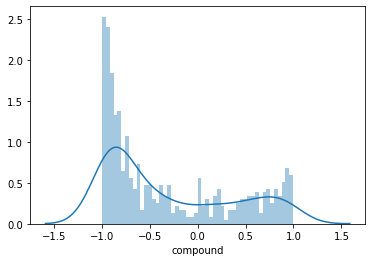

In [24]:
#Sentiment Polarity Distribution
sns.distplot(dataset['compound'],bins=50);

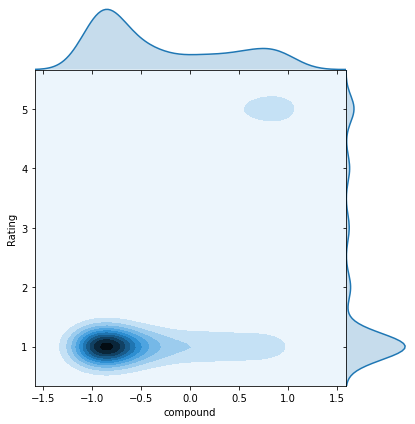

In [25]:
g = sns.jointplot("compound", "Rating", data=dataset, kind="kde", space=0)

In [26]:
dataset['sentiment_score'] = dataset['compound'].apply(lambda score:"positive" if score >= 0.1 else ("negative" if score <= -0.1 else "nutral"))
dataset.head()

,Rating,Title,Comment,time,length,scores,compound,sentiment_score
0,1,Totally unhelpful woman on the phone,Totally unhelpful woman on the phone. For ...,2020-05-23,258,"{'neg': 0.175, 'neu': 0.782, 'pos': 0.043, 'co...",-0.8527,negative
1,1,Unbelievably bad service,Unbelievably difficult to contact and tota...,2020-05-23,198,"{'neg': 0.273, 'neu': 0.629, 'pos': 0.098, 'co...",-0.8173,negative
2,1,Untrustworthy corrupt liars,Like hundreds of people my flights were ca...,2020-05-22,1455,"{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'com...",-0.5707,negative
3,1,Worst airline ever,Worst airline ever. Refuses to refund. Can...,2020-05-22,93,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7184,negative
4,1,Bailiffs on the way to Lufthansa UK offices,See judgement in County Court G5QZ25E2 Pea...,2020-05-22,810,"{'neg': 0.103, 'neu': 0.848, 'pos': 0.048, 'co...",-0.8020,negative


In [27]:
dataset['Rating'] = dataset['Rating'].astype(int)
dataset ['Rating_Change'] = dataset['Rating'].apply(lambda rate:"positive" if rate >= 4 else ("negative" if rate <= 2 else "nutral"))
dataset.head()

,Rating,Title,Comment,time,length,scores,compound,sentiment_score,Rating_Change
0,1,Totally unhelpful woman on the phone,Totally unhelpful woman on the phone. For ...,2020-05-23,258,"{'neg': 0.175, 'neu': 0.782, 'pos': 0.043, 'co...",-0.8527,negative,negative
1,1,Unbelievably bad service,Unbelievably difficult to contact and tota...,2020-05-23,198,"{'neg': 0.273, 'neu': 0.629, 'pos': 0.098, 'co...",-0.8173,negative,negative
2,1,Untrustworthy corrupt liars,Like hundreds of people my flights were ca...,2020-05-22,1455,"{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'com...",-0.5707,negative,negative
3,1,Worst airline ever,Worst airline ever. Refuses to refund. Can...,2020-05-22,93,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7184,negative,negative
4,1,Bailiffs on the way to Lufthansa UK offices,See judgement in County Court G5QZ25E2 Pea...,2020-05-22,810,"{'neg': 0.103, 'neu': 0.848, 'pos': 0.048, 'co...",-0.8020,negative,negative


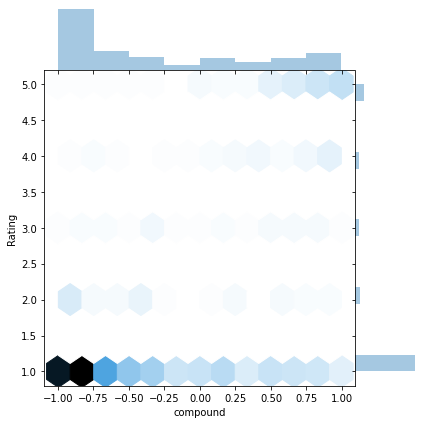

In [28]:
g = sns.jointplot("compound", "Rating", data=dataset, kind="hex",space=0)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(dataset['sentiment_score'],dataset['Rating_Change'])

0.7504273504273504

In [30]:
print(confusion_matrix(dataset['sentiment_score'],dataset['Rating_Change']))

[[367  11  10]
 [ 18   1   7]
 [ 87  13  71]]


In [31]:
print(classification_report(dataset['sentiment_score'],dataset['Rating_Change']))

              precision    recall  f1-score   support

    negative       0.78      0.95      0.85       388
      nutral       0.04      0.04      0.04        26
    positive       0.81      0.42      0.55       171

    accuracy                           0.75       585
   macro avg       0.54      0.47      0.48       585
weighted avg       0.75      0.75      0.73       585



In [32]:
for i in dataset.index:
    if (dataset['sentiment_score'][i] != dataset['Rating_Change'][i]):
        print(f"Comment {i}:\n{dataset['Comment'][i]}\n\n sentiment_score:  {dataset['sentiment_score'][i]}    Rating_Change: {dataset['Rating_Change'][i]}") 
        print('\n +++++++++++++++++')

Comment 8:
    Stay away from this airline. They care only about themselves

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 9:
    My Flight cancelled and refund assured and im still wating for it!

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 11:
    Disgraceful. Flights cancelled and refund assured on 18 March. Still nothing and so comfortable with it. This is a stalling technique and it is scurrilous. Give people their money back for the service not provided. Quoting Corona is insulting our intelligence. Its now double the 30 day refund regulation. Unbelievable conduct.

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 16:
    If lufthansa expect people to accept an alternative flight rather than refund during covid times then they need to offer options beyond April 2021, and get a Web system for rebooking.

 sentiment_score:  positive    Rating_Change: negative

 ++++++++++++

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 41:
    Added transfer to my direct flight, so I have to spend whole day traveling now, cannot cancel the flight and get my money back!

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 45:
    I tried calling their customer service number regarding a flight cancellation because of the virus. They graciously leave you on hold for 45 minutes to waste your time before cutting the line.

 sentiment_score:  nutral    Rating_Change: negative

 +++++++++++++++++
Comment 47:
    It is impossible to get in touch with Lufthansa Customer Service these days. I have tried several times lately in vain. Waited for a long time each time. Ok I understand that there might be a lot of phone calls due to corona situation, but this is not acceptable. Make a queue system or something like that

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 53:
    We will

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 70:
    I rebooked the flight twice, paid for it twice and Lufthansa issued only one invoice for two payment. I see in the bank transaction two invoice numbers, but the second invoice is not possible do download. The message is that the invoice doesnt exist.   I tried with sending more than one email to customer relation, then calling help desk and another number that first help desk shared. No one was able to help, and just sending me in circles from one help desk to another.   I still dont have the invoice and cannot reimburse the cost from  my company.

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 71:
    Baggage not delivered during my stay in Munich: Lufthansa sent my baggage to the Frankfurt airport instead of the Munich Airport: it was a direct flight!! As my stay was shorter than 4 days they refused to send my baggage to my hotel in Munich and they let me wit

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 107:
    I had to book Lufthansa for my Europe travel because it was pretty much the only option available. I had the expectation that it was going to be a decent airline because it is "German" and Germans brag about their quality and attention to detail.  Well one flight was worst than the other:  1. Unfriendly Staff 2. Very average plane  3. Poor quality food  4. Extra alcohol was served to drunk passengers that were singing the whole night on my flight to Madrid and they kept receiving more alcohol ... so we could not sleep the whole night   My flights were:  1. HongKong to Frankfurt  2. Frankfurt Madrid return  3. Today Munich to Beijing and to finish ruining my trip we are a family of three with an infant and this airline brag about being "FAMILY friendly" well they have given us sits separate all over the plane... no help and no respect.  This is without a doubt the worse airline I have ever used, 

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 148:
    Terrible customer service at the ticket counter at Ohare airport.  Lady was snippy from the moment I walked up to the counter.  I was putting my suitcase on the scale and she wanted my passport and I felt like I was being rushed but there was no lines.  Once I gave her my passport, she said in an unfriendly manner "your passport is not signed."  I explained that it was a new passport and I would be happy to sign it. She then got me checked in and said do you have a carry-on. I said yes and I showed her my carry-on she said well it has to fit in the container over there. I said ok but much to my surprise it did not fit. Been using the same carry-on for 10 years never had a problem with it before. It was very evident looking at the container that it was sized differently than what Ive typically seen in the past, width was skinnier.   I told her Id never had any issues before and she said something

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 183:
    I have never had an experience such as this one. The most complicated and convoluted way of registering then when trying to create a Miles&More account I have received a BLANK pdf instead of my login details. No way of resetting the PIN, not via the link on the email, not on the website. Tried the phone, after a long wait I was told they could only resend my PIN BY POST! And then they disconnected me. This is truly appalling. I have all sorts of loyalty programs and even the EasyJet App is easier than this.

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 186:
    I went to Europe for honeymoon of 15 days euro trip.I landed Paris on 28/09/2019 by Lufthansa LH1040 from Frankfurt to CDG.My checked in baggage didnt arrived at CDG airport. For bag claim, I filled the form at airport for baggage claim with Lufthansa & got a receipt with file reference number.They sa

 sentiment_score:  negative    Rating_Change: positive

 +++++++++++++++++
Comment 219:
    Flew a 747 from US to Europe. The Flight Attendants and service were very good. The seats were very cramped and uncomfortable. I would strongly recommend bringing your own headphones the ones they supplied were terrible. There were a lot of movies to choose from. Ill probably be flying them again soon. If I have extra $ Ill go 1st class for some comfort but the upgrade is expensive.

 sentiment_score:  negative    Rating_Change: nutral

 +++++++++++++++++
Comment 220:
    Recently I should have flown TXL/FRA/MAN however due storms in FRA the TXL departure delayed, and resulted in one hour on ground on aircraft at TXL. missing my FRA/ MAN connection. The flight crew and cabin attendants were very professional in dealing with the delay due to weather, and are a wonderful credit to the airline, as were the LH ground staff on arrival at FRA, booking an hotel in FRA  and re-booking my flight the foll

 sentiment_score:  negative    Rating_Change: nutral

 +++++++++++++++++
Comment 276:
    My mom was travelling on the Vancouver-Frankfurt flight on a long-haul journey with a connection at Frankfurt. The norm would have been a catering service comprising of a main meal and a snack meal (i.e. sandwiches), however it was to her surprise that the crew only served the passengers once. Consider the mere 10 hour journey, its odd to have a catering service of such sort.  Furthermore, the Lufthansa online check-in service was offline and we were not able to check-in mom and choose her desired seat, turning up to the airport and she was allocated with an awkward toilet view for 10 hours, one might find it pleasing but not in our camp. Very much a below par service from the German National carrier. Perhaps our last time with Lufthansa.

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 279:
    Dreadful website. Slow at best of times and often not working. Very 

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 350:
    Very bad behavior by Lufthansa by booking an overseas flight! .... Before I booked a ticket on-line for my gf that there was a problem as only the title Mrs (which was a mandatory field) could be choose, even she is a Ms! .... they told me twice when I called them about the problem, that it could easily be changed if I called them after the booking had been made ... but when I called them, they told me that it was not possible!!! .. how stupid are you allowed to be!!! Lufthansa told on phone that they would make an internal notice if something should go wrong in the airports she would pass - I asked for an confirmation on Email, but they refused to give me .... so if something should go wrong, they probably dont remember or never said!!!  More stupidiness! I even booked a flight-ticket online and got a booking number and was told I  could pay either on the phone or on Lufthansa homepage. I chose

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 385:
 

 sentiment_score:  nutral    Rating_Change: positive

 +++++++++++++++++
Comment 392:
    reliable pros.

 sentiment_score:  nutral    Rating_Change: positive

 +++++++++++++++++
Comment 393:
    Lufthansa Customer Service number  0371 945 9747 gets redirected to a 0871 number which cost 10p minute. They make you wait so that your phone bill goes up by the minute playing music. If you need to speak to them urgently then you will end up with a large telephone bill as 0871 numbers are not included in most tariff. Suddenly overnight Lufthansa are not sending boarding passes once you have successfully checked in online for no apparent reason

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 395:
    Could not get a simple answer of how large a pram could be before it wasnt free to take on board.  Got 3 separate answers from 3 people all of which couldnt send a confir

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 438:
    My wife and I flew from London Heathrow to Bangkok, via Frankfurt on the 13th December 2017.&#160; We booked specific seats on the Frankfurt to Bangkok flight (LH772).&#160; When we booked the seats (76H and 76J) it was clear from the diagram of the plan layout that the seats we booked were exit seats with extra leg room.&#160; However, the actual seats had no extra leg room at all.&#160; We feel we were mis-sold these seats.&#160; Had normal seats been suitable for both of us then we would not have paid extra for specific ones.  &#160;  I am 63" tall and have type 1 diabetes.&#160; I also have Klinefelters syndrome which means that my legs are extra long in proportion to my height.&#160; I struggle to physically fit in standard seats.&#160; I also have pain in my knees related to Klinefelters syndrome and the loss of bone density it causes.  &#160;  I spoke to a steward immediately on boarding 

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 487:
    I chose Luftansa because its a german company and I thought...It might be good. First of all the seats of the plane are tiny, similar to easy jet, considering I spend over 12 hours there it was a nightmare flying with them.  Food was disgusting, truly disgusting. Cabin crew did a great job, they offered drinks during the whole flight so nothing to say about them other than Thanks  My flight was cancelled because of technical issues, I put a complaint and they replied saying that according to the european bla bla bla I was not supposed to get a compensation because it was a technical issue. That european law says that if the flight is cancelled because of a companyissue, then I have to get a compensation... So I replied telling them about that so they decided to pay me. But their first answer was..Sorry!   Honestly, I would never fly with them again, but mainly because of the size of their flight

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 533:
    I tried to purchase a ticket online but was unable to do so. I thought there was an error with my credit card but a call to my issuer let me know that that wasnt the case, and that it was OK to conduct international transaction, and all was alright. I tried purchasing a few more times and to my disappointment, only the error message came out. Called the number once but did not work. I gave up and purchased on another site. I hope you have alternatives to your payment method, like PayPal so you can better facilitate your customers with an easy purchase experience.

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 539:
    My flight from Munich to Manchester was cancelled as I was on my way to the airport. Tried doing the rebooking online and it told me to ring up....what good that did me! Couldnt get through to anyone!  Had to book my own hotel, my own flight bac

 sentiment_score:  positive    Rating_Change: nutral

 +++++++++++++++++
Comment 576:
    I fly often, and choose Lufthansa more than half of the time. I find it very reliable and with relatively low prices when booking online some time in advance.  The only reason I dont vie 5 stars is that the online pricing can be confusing, since they full price including all fees (which can be half of the ticket price) is not given until the very end of the booking cycle. Thus it is very difficult to compare prices with other airlines in searches.

 sentiment_score:  negative    Rating_Change: positive

 +++++++++++++++++
Comment 579:
    has only profit in mind, people and health dont count

 sentiment_score:  positive    Rating_Change: negative

 +++++++++++++++++
Comment 580:
    I booked to fly from UK to Frankfurt via Dusseldorf for a sporting event.  The event was changed to Dusseldorf so I called Lufthansa to cancel the last leg of the journey only to be told by a South African woman that I

In [33]:
test =  dataset.Comment[dataset['sentiment_score']=='positive']
s = ' '
text = s.join(test)

In [36]:
import re
bannedWord = ['Nike','Lufthansa','flight','airline']
def RemoveBannedWords(toPrint,database):
    statement = toPrint
    pattern = re.compile("\\b(Nike|shoe|Lufthansa|flight|airline)\\W", re.I)
    return pattern.sub("", toPrint)

text = RemoveBannedWords(text,bannedWord)
text

'    Stay away from this  They care only about themselves     My cancelled and refund assured and im still wating for it!     Disgraceful. Flights cancelled and refund assured on 18 March. Still nothing and so comfortable with it. This is a stalling technique and it is scurrilous. Give people their money back for the service not provided. Quoting Corona is insulting our intelligence. Its now double the 30 day refund regulation. Unbelievable conduct.     Its a little frustrating to have to call, but it was pretty easy to get my flights refunded (due to cancellation from the virus).  Managed to get through to the German HQ after a few technical issues (only had to wait approx 12 mins to get through to a person) and requested a refund for my flights- which the lady on the other end automatically processed! Only issue is there is no clear timeframe for when the funds will be refunded.     If expect people to accept an alternative rather than refund during covid times then they need to offe

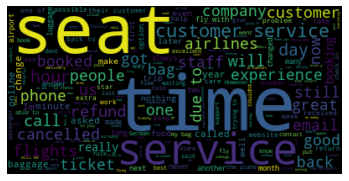

In [37]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
test =  dataset.Comment[dataset['sentiment_score']=='negative']
s = ' '
text = s.join(test)

In [39]:
import re
bannedWord = ['Nike','nike','Lufthansa','flight','airline']
def RemoveBannedWords(toPrint,database):
    statement = toPrint
    pattern = re.compile("\\b(Nike|shoe|Lufthansa|flight|airline)\\W", re.I)
    return pattern.sub("", toPrint)



text = RemoveBannedWords(text,bannedWord)
text

'    Totally unhelpful woman on the phone. For the first time I have received that bad service on their site. She did not want at all listen my viewpoint.  Even in a period of crisis you need to be respectful. I do not know why those people do this kind of work if they can not offer the basic rules of communication. Too bad.     Unbelievably difficult to contact and totally unhelpful website even worse Australian contacts. Their complaints number is even disconnected, we will never use this again. Terrible service from what was once a good      Like hundreds of people my flights were cancelled by the in Mid April so I rang to request a refund (this should be automatic but...) the agent offered a voucher which I declined as the event I was to travel for is cancelled and will not be refixed for a later date.I was told it would take a number of weeks to process which is against the EU directive which they know, but do not care about.  After a month I rang and was told by an agent that my 

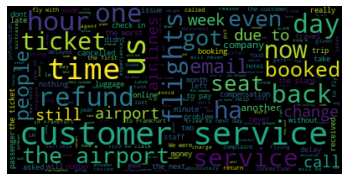

In [40]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()